In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
%matplotlib inline


2. List the S&P500 companies that have the top 5 highest trailing PE, and the top 5 with highest forward PE. 

First, we get list of S&P500 companies and their tickers (stock symbols) 

In [30]:
## scraping wikipedia table to get list of tickers of companies aka constituents

# There are 2 tables on the Wikipedia page, we want the first table
# second table shows the evolution of the changes

components = \
pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')

first_table = components[0]
second_table = components[1]
sp_df = first_table
sp_df.Symbol
sp500_tickers = sp_df.Symbol

In [19]:
#make sure we have data = 503 symbols
sp500_tickers.info()

<class 'pandas.core.series.Series'>
RangeIndex: 503 entries, 0 to 502
Series name: Symbol
Non-Null Count  Dtype 
--------------  ----- 
503 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [70]:
#other data we got from wikipedia
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [69]:
##yahoo finance to call market cap of a stock
yf.Ticker('MSFT').info['marketCap']

3049006825472

In [26]:
#get PE data for tickers in S&P500


SP500_PE=[]


for ticker in sp500_tickers:
    try:
    #if symbol not in ['INFO', 'AES']:
        ticker=ticker.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(ticker)
        print(ticker,round(ticker_yahoo.info['forwardPE'],2))
        SP500_PE.append(
            {
                "Ticker":ticker,
                "trainlingPE":ticker_yahoo.info['trailingPE'],
                "forwardPE": ticker_yahoo.info['forwardPE']
            }
        )
    except:
        pass

SP500_PE=pd.DataFrame(SP500_PE)

MMM 9.08
AOS 18.8
ABT 23.38
ABBV 14.56
ACN 27.85
ADBE 27.25
AMD 32.39
AES 8.47
AFL 11.6
A 21.75
APD 17.36
ABNB 31.28
AKAM 14.76
ALB 13.09
ARE 35.65
ALGN 30.18
ALLE 17.17
LNT 14.8
ALL 9.64
GOOGL 18.36
GOOG 18.63
MO 7.85
AMZN 32.95
AMCR 12.7
AEE 15.67
AAL 4.64
AEP 14.72
AXP 14.54
AIG 8.78
AMT 39.0
AWK 21.02
AMP 11.02
AME 23.95
AMGN 13.67
APH 29.28
ADI 24.69
ANSS 32.04
AON 17.76
APA 5.38
AAPL 25.46
AMAT 20.78
APTV 10.71
ACGL 10.23
ADM 9.17
ANET 31.27
AJG 21.55
AIZ 10.53
T 7.3
ATO 15.97
ADSK 31.64
ADP 25.59
AZO 16.77
AVB 31.6
AVY 20.41
AXON 65.85
BKR 11.86
BALL 18.12
BAC 9.86
BK 9.46
BBWI 14.23
BAX 13.21
BDX 17.17
BRK-B 23.05
BBY 12.44
BIO 27.82
TECH 35.46
BIIB 12.56
BLK 17.82
BX 20.34
BA 25.65
BKNG 16.66
BWA 6.94
BXP 32.19
BSX 26.27
BMY 7.24
AVGO 23.17
BR 23.59
BRO 22.71
BF-B 27.12
BLDR 13.25
BG 9.51
CDNS 43.67
CZR 15.9
CPT 55.15
CPB 13.14
COF 8.27
CAH 13.49
KMX 21.26
CCL 11.2
CARR 17.6
CTLT 39.18
CAT 14.6
CBOE 22.03
CBRE 16.09
CDW 21.49
CE 10.57
COR 16.28
CNC 10.57
CNP 16.04
CF 12.78
CHR

In [27]:
SP500_PE

,Ticker,trainlingPE,forwardPE
0,AOS,22.059620,18.799076
1,ABT,36.644173,23.377690
2,ABBV,65.474266,14.561733
3,ACN,34.969418,27.846495
4,ADBE,46.743244,27.249632
...,...,...,...
463,YUM,24.744186,21.312790
464,ZBRA,48.075176,19.530539
465,ZBH,26.471310,14.882487
466,ZION,8.972414,8.411638


Companies that have the top 5 highest trailing PE

In [12]:
# top 5 companies with highest training PE
SP500_PE.sort_values('trainlingPE', ascending=False).head(5)

,Ticker,trainlingPE,forwardPE
392,SJM,12592.00000,12.345099
295,MRK,924.64280,13.263319
5,AMD,333.05664,32.388992
106,CLX,242.60316,23.513845
12,ARE,225.79630,35.652046


Companies that have the top 5 highest forward PE

In [13]:
# top 5 companies with highest forward PE
SP500_PE.sort_values('forwardPE', ascending=False).head(5)

,Ticker,trainlingPE,forwardPE
138,DLR,45.946667,111.161285
426,UDR,26.753729,71.700000
166,EQIX,85.493220,67.608430
51,AXON,138.784600,65.846720
123,CSGP,92.163040,65.223080


Companies that have the top 5 lowest trailing PE

In [15]:
# companies with lowest trailing PE
SP500_PE.sort_values('trainlingPE', ascending=True).head(5)

,Ticker,trainlingPE,forwardPE
35,APA,3.246487,5.381721
189,FMC,4.631299,10.434263
205,GM,5.413934,4.359736
434,VLO,5.681380,10.975194
429,UAL,5.768061,3.936851


Companies that have the top 5 lowest forward PE

In [14]:
# companies with lowest forward PE
SP500_PE.sort_values('forwardPE', ascending=True).head(5)

,Ticker,trainlingPE,forwardPE
429,UAL,5.768061,3.936851
205,GM,5.413934,4.359736
22,AAL,12.504132,4.641104
440,VTRS,8.960265,4.814947
35,APA,3.246487,5.381721


3. Suppose that you want to establish a portfolio among only those S&P 500 companies with the following features:
    a. Market Cap between the 40-60% quantile
    b. Foward PE among the 30-50% quantile

We have PE data. We need to get Market Cap data

In [36]:
##get market capitalization from yahoo fiance ticker function and put them into a df

SP500_MKTCAP=[]


for ticker in sp500_tickers:
    try:
    #if symbol not in ['INFO', 'AES']:
        ticker=ticker.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(ticker)
        print(ticker,round(ticker_yahoo.info['marketCap']))
        SP500_MKTCAP.append(
            {
                "Ticker":ticker,
                "marketCap":ticker_yahoo.info['marketCap'],
            }
        )
    except:
        pass

SP500_MKTCAP=pd.DataFrame(SP500_MKTCAP)

MMM 51168968704
AOS 11981673472
ABT 207284600832
ABBV 314590625792
ACN 236576620544
ADBE 250154876928
AMD 285219258368
AES 10714063872
AFL 46515494912
A 38690070528
APD 51749445632
ABNB 97376477184
AKAM 16333669376
ALB 14164672512
ARE 21330921472
ALGN 24269555712
ALLE 11302396928
LNT 12472070144
ALL 41861853184
GOOGL 1797455872000
GOOG 1797324406784
MO 72531107840
AMZN 1817691160576
AMCR 13398302720
AEE 19067078656
AAL 9906472960
AEP 43358474240
AXP 155313553408
AIG 48565637120
AMT 88538710016
AWK 23168055296
AMP 40830472192
AME 41166516224
AMGN 154977058816
APH 64466415616
ADI 94277066752
ANSS 29663498240
AON 62527328256
APA 9055636480
AAPL 2818455633920
AMAT 164049354752
APTV 21549950976
ACGL 32585357312
ADM 28509214720
ANET 83679617024
AJG 53115998208
AIZ 9271243776
T 120120328192
ATO 17008718848
ADSK 55018942464
ADP 105109094400
AZO 47662358528
AVB 24909430784
AVY 17284413440
AXON 20279334912
BKR 30125533184
BALL 19850723328
BAC 267040604160
BK 42249900032
BBWI 10675712000
BAX 2160

In [29]:
SP500_MKTCAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ticker     502 non-null    object
 1   marketCap  502 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.0+ KB


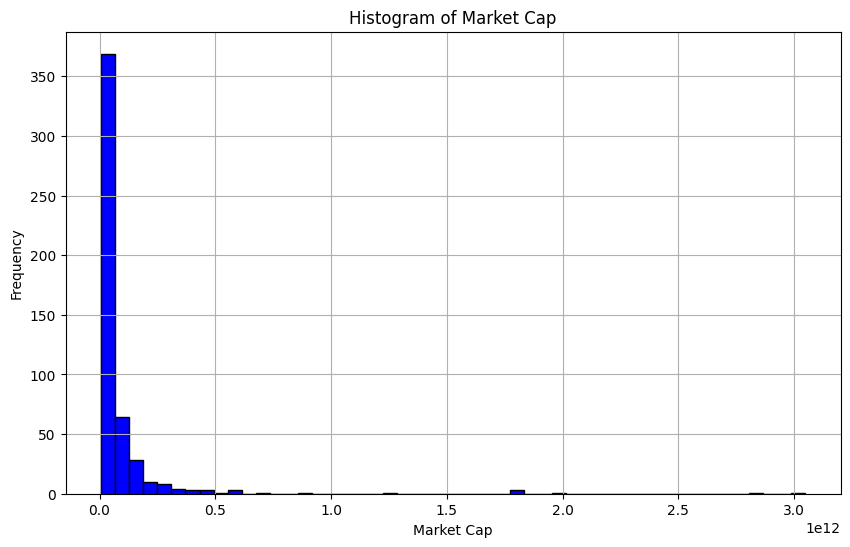

In [41]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(SP500_MKTCAP['marketCap'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Market Cap')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Companies with Market Cap between 40-60% quantile

In [37]:
# companies with market cap between 40-60% quantile 
lower_bound = SP500_MKTCAP['marketCap'].quantile(0.4)
upper_bound = SP500_MKTCAP['marketCap'].quantile(0.6)

marketcap_names = SP500_MKTCAP[(SP500_MKTCAP['marketCap'] > lower_bound) & (SP500_MKTCAP['marketCap'] < upper_bound)]
marketcap_names['Ticker']
marketcap_names
#SP500_MKTCAP.query('@lower_bound < marketCap < @upper_bound').sort

,Ticker,marketCap
9,A,38690070528
18,ALL,41861853184
26,AEP,43358474240
31,AMP,40830472192
32,AME,41166516224
...,...,...
492,WTW,28461473792
495,XEL,32937404416
496,XYL,30352207872
497,YUM,38914396160


In [38]:
marketcap_names['Ticker']

9        A
18     ALL
26     AEP
31     AMP
32     AME
      ... 
492    WTW
495    XEL
496    XYL
497    YUM
499    ZBH
Name: Ticker, Length: 100, dtype: object

Companies with Foward PE among the 30-50% quantile

In [68]:
# companies with Forward PE between 30-50% quantile 
lower_bound = SP500_PE['forwardPE'].quantile(0.3)
upper_bound = SP500_PE['forwardPE'].quantile(0.5)

marketcap_names = SP500_PE[(SP500_PE['forwardPE'] > lower_bound) & (SP500_PE['forwardPE'] < upper_bound)]
marketcap_names
#SP500_MKTCAP.query('@lower_bound < marketCap < @upper_bound').sort

,Ticker,trainlingPE,forwardPE
2,ABBV,65.474266,14.561733
10,AKAM,30.730114,14.757162
15,LNT,17.517986,14.802432
21,AEE,16.235828,15.667396
23,AEP,18.910550,14.723214
...,...,...,...
451,WEC,18.687204,15.049619
457,WMB,13.037313,16.403755
458,WTW,27.924550,14.971413
461,XEL,18.482866,15.450521


In [39]:
marketcap_names.to_csv('marketcap_portfolio.csv')

4. Based on the returns from the stocks in the S&P500 Index

4.1 Group the stocks by sectors 'GICS Sector', compute and the average rate of returns for the stocks in the same sector. 

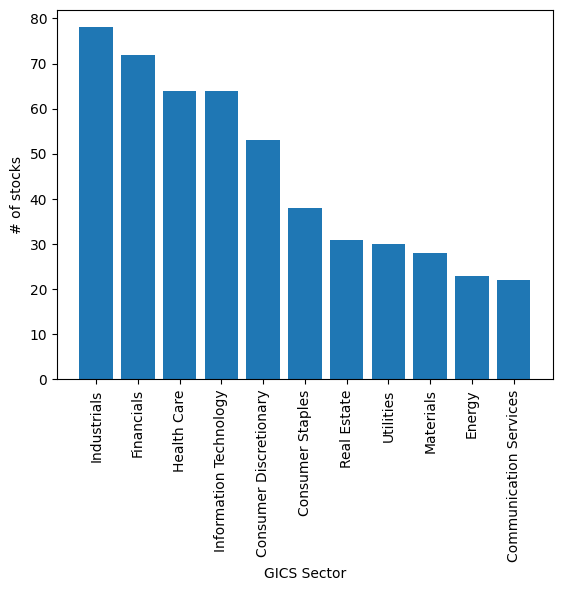

<Figure size 800x600 with 0 Axes>

In [33]:
##Quick EDA on the GICS sector distribution

sectors_counts = sp_df["GICS Sector"].value_counts()
plt.bar(sectors_counts.index, sectors_counts.values)
plt.xticks(rotation=90)
plt.xlabel("GICS Sector")
plt.ylabel("# of stocks")
plt.figure(figsize=(8,6))
plt.show()

In [21]:
#creating lists of tickers/symbols for each sector
industrials = sp_df.where(sp_df['GICS Sector'] == 'Industrials')['Symbol'].dropna().values.tolist()
financials = sp_df.where(sp_df['GICS Sector'] == 'Financials')['Symbol'].dropna().values.tolist()
healthcare = sp_df.where(sp_df['GICS Sector'] == 'Health Care')['Symbol'].dropna().values.tolist()
infotech = sp_df.where(sp_df['GICS Sector'] == 'Information Technology')['Symbol'].dropna().values.tolist()
consdisc = sp_df.where(sp_df['GICS Sector'] == 'Consumer Discretionary')['Symbol'].dropna().values.tolist()
consstap = sp_df.where(sp_df['GICS Sector'] == 'Consumer Staples')['Symbol'].dropna().values.tolist()
realestate = sp_df.where(sp_df['GICS Sector'] == 'Real Estate')['Symbol'].dropna().values.tolist()
utilities = sp_df.where(sp_df['GICS Sector'] == 'Utilities')['Symbol'].dropna().values.tolist()
materials = sp_df.where(sp_df['GICS Sector'] == 'Materials')['Symbol'].dropna().values.tolist()
energy = sp_df.where(sp_df['GICS Sector'] == 'Energy')['Symbol'].dropna().values.tolist()
comms = sp_df.where(sp_df['GICS Sector'] == 'Communication Services')['Symbol'].dropna().values.tolist()

In [27]:
# Function to calculate average annual return for a list of tickers
def calculate_average_annual_return(sp500_tickers):
    start_date = "2000-01-01"  # 23 yea period since 2000
    end_date = "2023-12-29"
    annual_returns = []

    for ticker in sp500_tickers:
        # Fetch historical data
        data = yf.download(ticker, start=start_date, end=end_date)
        
        # Calculate annual return
        if not data.empty:
            total_return = data['Adj Close'][-1] / data['Adj Close'][0] - 1
            annual_return = (1 + total_return) ** (1/23) - 1  # Compound annual growth rate (CAGR) for 23 year period
            annual_returns.append(annual_return)

    # Return the average annual return for the sector
    return np.mean(annual_returns) if annual_returns else None

# Calculate average annual return for each sector
industrials_avg_return = calculate_average_annual_return(industrials)
financials_avg_return = calculate_average_annual_return(financials)
healthcare_avg_return = calculate_average_annual_return(healthcare)
infotech_avg_return = calculate_average_annual_return(infotech)
consdisc_avg_return = calculate_average_annual_return(consdisc)
consstap_avg_return = calculate_average_annual_return(consstap)
realestate_avg_return = calculate_average_annual_return(realestate)
utilities_avg_return = calculate_average_annual_return(utilities)
materials_avg_return = calculate_average_annual_return(materials)
energy_avg_return = calculate_average_annual_return(energy)
comms_avg_return = calculate_average_annual_return(comms)

# Print the results
print("Industrials Average Return:", industrials_avg_return)
print("Financials Average Return:", financials_avg_return)
print("Health Care Average Return:", healthcare_avg_return)
print("Information Technology Average Return:", infotech_avg_return)
print("Consumer Discretionary Average Return:", consdisc_avg_return)
print("Consuer Staple Average Return:", consstap_avg_return)
print("Real Estate Average Return:", realestate_avg_return)
print("Utilities Average Return:", utilities_avg_return)
print("Materials Average Return:", materials_avg_return)
print("Energy Average Return:", energy_avg_return)
print("Communication Servicves Average Return:", comms_avg_return)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Industrials Average Return: 0.11684917392035221
Financials Average Return: 0.09492399013847072
Health Care Average Return: 0.124214605845488
Information Technology Average Return: 0.11098745076706465
Consumer Discretionary Average Return: 0.12287447413420419
Consuer Staple Average Return: 0.09399790833729721
Real Estate Average Return: 0.11288062876213399
Utilities Average Return: 0.09264092059847293
Materials Average Return: 0.09851837273356259
Energy Average Return: 0.09965521725815753
Communication Servicves Average Return: 0.07368550333009338


Based on the average returns from 2000 to 2023, discuss the performance of the stocks in different sectors. 
